In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
def getdata(m):
    X= np.random.rand(m,1)
    noise = np.random.randn(m,1)
    Y=4*X**7 - X**5 - 12*X**4 +7*X +2+ 0.1*noise
    Y=Y.reshape((m,))
    return X,Y

In [9]:
X,Y =getdata(100)

In [10]:
print(X.shape)
print(Y.shape)

(100, 1)
(100,)


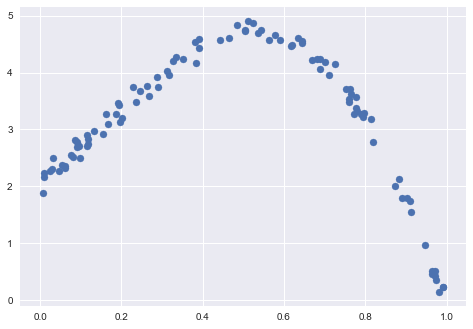

In [11]:
plt.style.use("seaborn")
plt.scatter(X,Y)
plt.show()

In [13]:
def getW(X,q,tau):
    m=X.shape[0]
    W= np.eye(m)
    
    for i in range(m):
        W[i,i] = np.exp(-np.dot((X[i]-q),(X[i]-q).T)/(2*tau*tau))
    return W

def getTheta(X,Y,q,tau):
    m=X.shape[0]
    ones= np.ones((m,1))
    X= np.hstack((ones,X))
    W=getW(X,q,tau)
    Y= Y.reshape((-1,1))
    q=np.array([1,q])
    
    theta = np.dot(np.linalg.pinv(np.dot(np.dot(X.T,W),X)),np.dot(np.dot(X.T,W),Y))
    return theta,W

In [14]:
theta,W = getTheta(X,Y,0.6,1)


In [15]:
print(theta.shape)
print(W)

(2, 1)
[[0.91853686 0.         0.         ... 0.         0.         0.        ]
 [0.         0.7745834  0.         ... 0.         0.         0.        ]
 [0.         0.         0.80436242 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.79244218 0.         0.        ]
 [0.         0.         0.         ... 0.         0.7982516  0.        ]
 [0.         0.         0.         ... 0.         0.         0.85806047]]


In [17]:
X_test =np.linspace(0,1,10)
print(X_test)
Y_Test = []

for xt in X_test:
    theta,W = getTheta(X,Y,xt,0.1)
    pred = theta[0][0] + theta[1][0]*xt
    Y_Test.append(pred)
    
Y_Test = np.array(Y_Test)
print(Y_Test.shape)
print(Y_Test)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
(10,)
[2.07168189 2.77783642 3.46210882 4.06171815 4.45082141 4.52309721
 4.14066859 3.23836947 1.77054462 0.03836114]


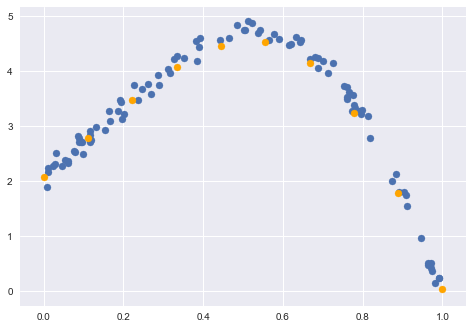

In [19]:
plt.scatter(X,Y)
plt.scatter(X_test,Y_Test,c='orange')
plt.show()